In [8]:
import os
import pandas as pd

In [10]:

base_path = os.path.abspath('data')


In [13]:
base_path = os.path.abspath('data')
print(f"Base Path: {base_path}")

Base Path: c:\solar_farm_data_analysis\solar_farm_data_analysis\notebooks\data


In [23]:
base_path = 'c:/solar_farm_data_analysis/solar_farm_data_analysis/notebooks/data'


In [25]:
df_benin = pd.read_csv('C:\\solar_farm_data_analysis\\solar_farm_data_analysis\\data\\benin-malanville.csv')
df_sierraleone = pd.read_csv('C:\\solar_farm_data_analysis\\solar_farm_data_analysis\\data\\sierraleone-bumbuna.csv')
df_togo = pd.read_csv('C:\\solar_farm_data_analysis\\solar_farm_data_analysis\\data\\togo-dapaong_qc.csv')

In [28]:
print("Benin Data:")
print(df_benin.head())
print("\nSierra Leone Data:")
print(df_sierraleone.head())
print("\nTogo Data:")
print(df_togo.head())

Benin Data:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

Sierra 

In [31]:
#Summary statistics for numeric columns
print(df_benin.describe())
print(df_sierraleone.describe())
print(df_togo.describe())


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [37]:
print(df_benin.isnull().sum())
print(df_sierraleone.isnull().sum())
print(df_togo.isnull().sum())

# Checking for outliers and anomalies
import numpy as np

def detect_outliers(df, column):

    # Z-score method
    from scipy import stats
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    return df[(z_scores > 3)]


outliers_benin = detect_outliers(df_benin, 'GHI')
print(outliers_benin)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Timestamp             0
GHI                   0
DNI           

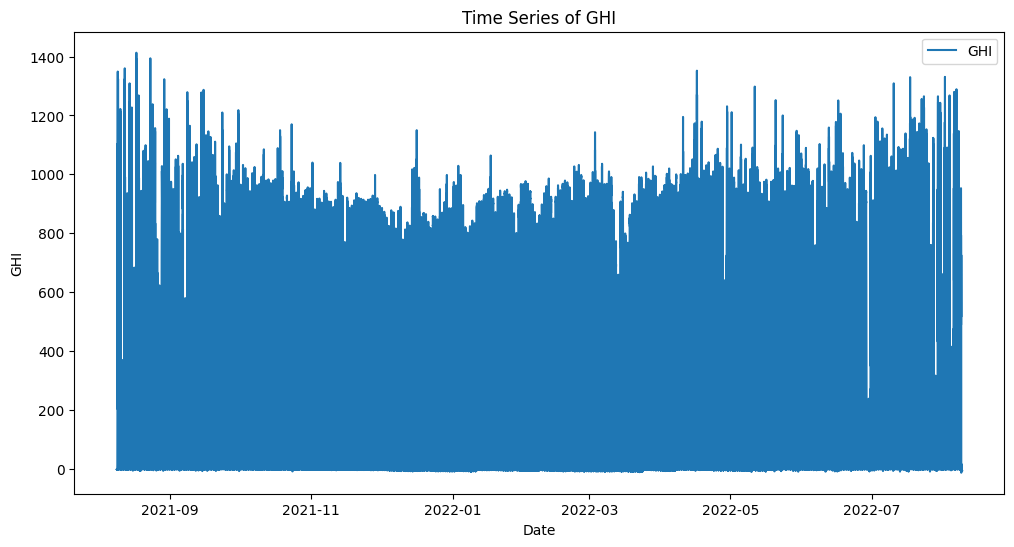

In [38]:
import matplotlib.pyplot as plt

def plot_time_series(df, column):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df[column], label=column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Time Series of {column}')
    plt.legend()
    plt.show()

plot_time_series(df_benin, 'GHI')

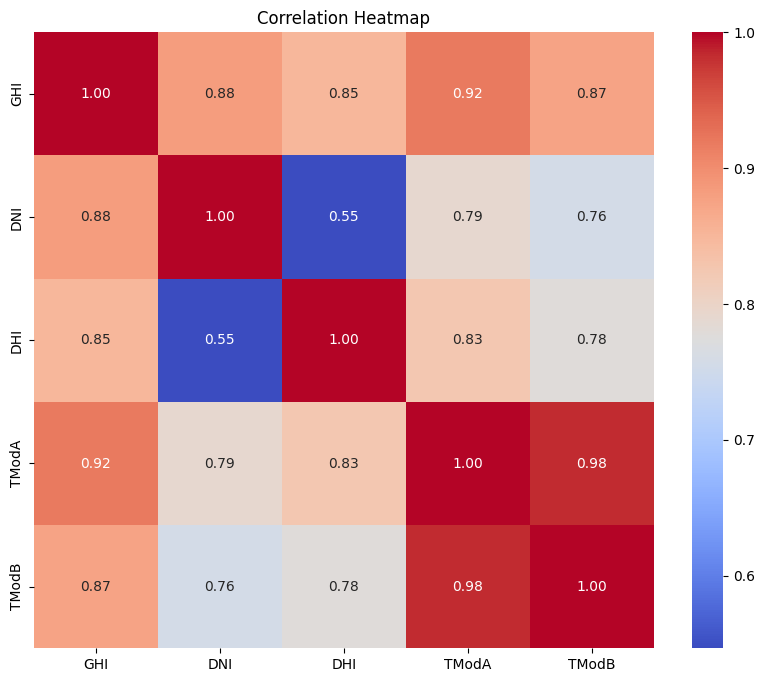

In [40]:
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()


plot_correlation_heatmap(df_benin)

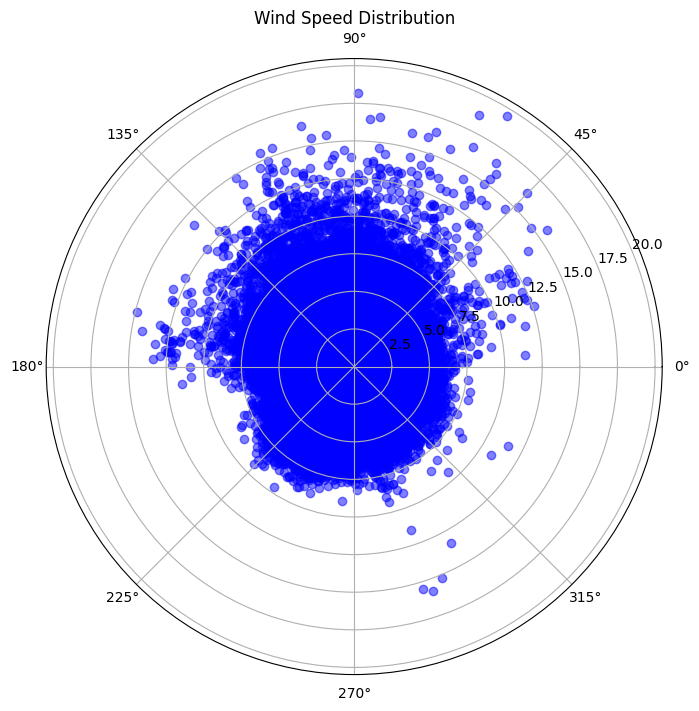

In [42]:
def plot_wind_polar(df):
    plt.figure(figsize=(8, 8))
    plt.subplot(projection='polar')
    theta = np.deg2rad(df['WD'].dropna())
    r = df['WS'].dropna()
    plt.scatter(theta, r, c='b', alpha=0.5)
    plt.title('Wind Speed Distribution')
    plt.show()


plot_wind_polar(df_benin)


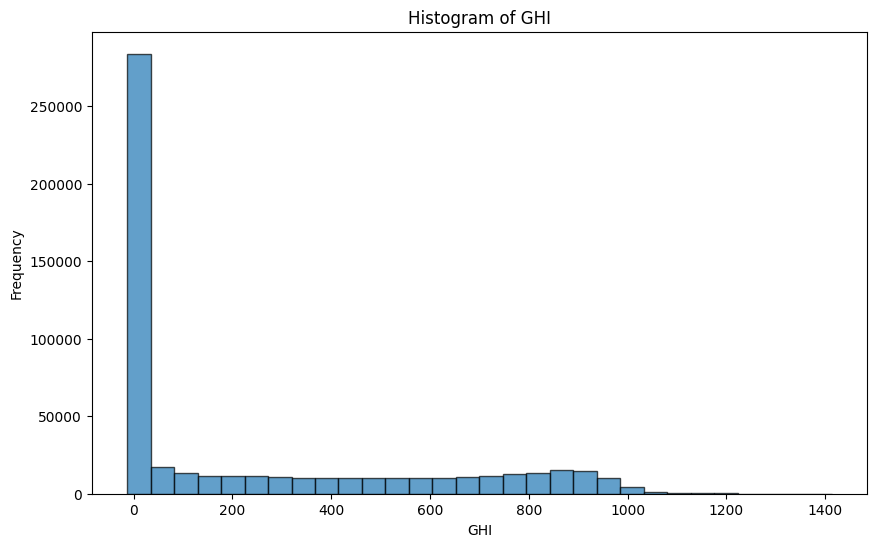

In [43]:
def plot_histogram(df, column):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

# Example: Histogram of GHI
plot_histogram(df_benin, 'GHI')
